In [2]:
import tensorflow
tensorflow.__version__

'2.8.0'

In [3]:
import keras
keras.__version__

'2.8.0'

In [4]:
import chem

In [5]:
#!pip install rdkit
#!pip install rxnfp


In [6]:
import scipy
scipy.__version__

'1.8.0'

In [7]:
#!pip install scipy==1.4.1

In [8]:
import networkx as nx

In [9]:
!pip install pysmiles

In [10]:
nx.__version__

'2.7'

In [11]:
import rdkit
import chem
from rdkit.Chem import Draw
from rdkit import Chem

In [12]:
rdkit.__version__

'2021.09.4'

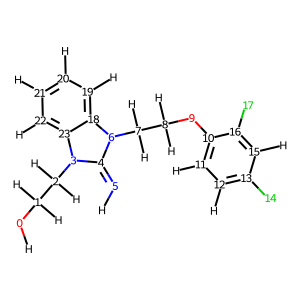

In [13]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import pysmiles

s1 = 'OCCn2c(=N)n(CCOc1ccc(Cl)cc1Cl)c3ccccc23'  # aromatic
s2 = 'OCCN2C(=N)N(CCOC1=CC=C(Cl)C=C1Cl)C3=CC=CC=C23'  # kekulized


def show_implicit_h(smiles):
    m = Chem.MolFromSmiles(smiles)
    for atom in m.GetAtoms():
        atom.SetProp('atomLabel', str(atom.GetIdx()))
    m = Chem.AddHs(m)
    return Draw.MolToImage(m, size=(300, 300))


show_implicit_h(s1)

enter the molecule SMILES[Pt](Cl)(Cl)(N)N


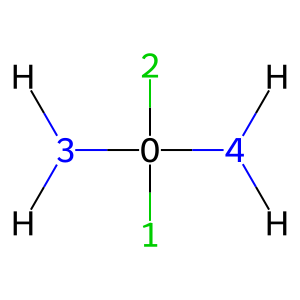

In [14]:
search = input("enter the molecule SMILES")

def run_search_app(smiles):
    m = Chem.MolFromSmiles(smiles)
    for atom in m.GetAtoms():
        atom.SetProp('atomLabel', str(atom.GetIdx()))
    m = Chem.AddHs(m)
    return Draw.MolToImage(m, size=(300,300))

run_search_app(search)


In [15]:
rdkit.__version__

'2021.09.4'

In [16]:
from rdkit import rdBase
rdBase.rdkitVersion
rdBase.boostVersion

'1_69'

In [17]:
import sys
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

In [18]:
mol = Chem.MolFromSmiles('CCCC')

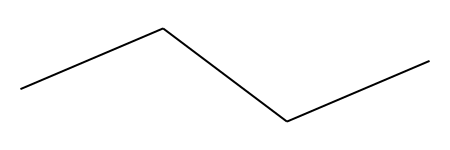

In [19]:
mol

In [20]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCC'

In [21]:
mw = Descriptors.MolWt(mol)
mw

58.123999999999995

In [22]:
smiles_list = ['C(C(=O)O)N','n[C@@H](CC1=CC=C1)C(O)=O',
              'O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S']

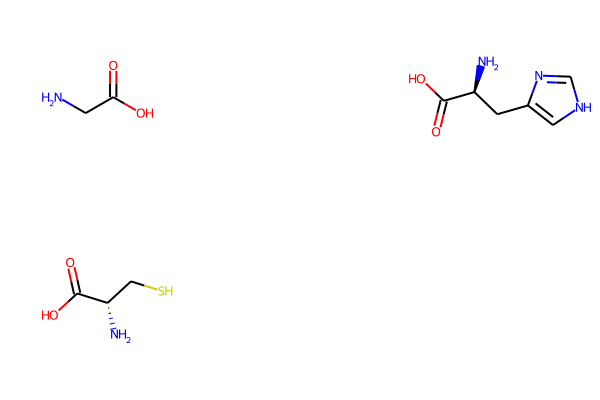

In [23]:
mol_list = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)
    
img = Draw.MolsToGridImage(mol_list, molsPerRow=3)
img

In [25]:
pattern = Chem.MolFromSmarts('[r]')
for mol in mol_list:
    print(mol.HasSubstructMatch(pattern))

IndentationError: expected an indented block (1322887424.py, line 3)

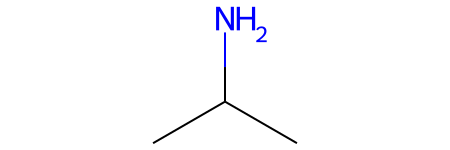

In [26]:
Chem.MolFromSmiles('CC(N)C')

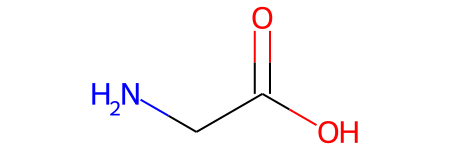

In [27]:
glycine = mol_list[0]
glycine

In [28]:
bi = {}

fp = AllChem.GetMorganFingerprintAsBitVect(glycine,2, nBits=1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]

In [29]:
prints = [(glycine, x, bi) for x in fp.GetOnBits()]

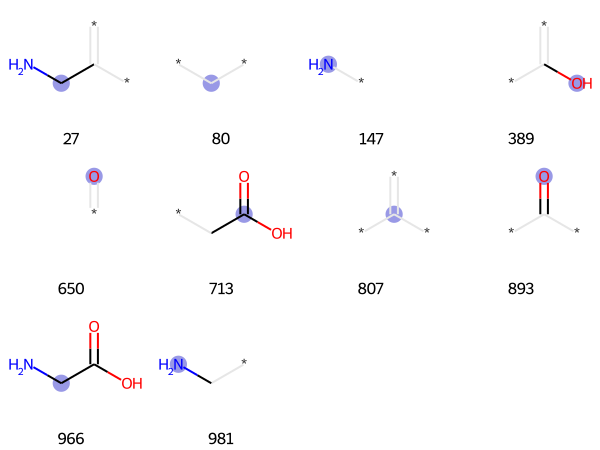

In [30]:
#prints
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

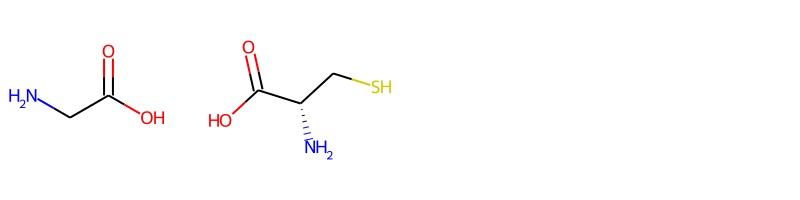

In [31]:
cysteine = mol_list[3]
img = Draw.MolsToGridImage([glycine, cysteine], molsPerRow=4)
img

In [32]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(cysteine, 2, nBits=1024, bitInfo=bi)
print('cys',list(fp2.GetOnBits()))
print('gly',list(fp.GetOnBits()))

common = set(fp2.GetOnBits()) & set(fp.GetOnBits())
combined = set(fp2.GetOnBits()) | set(fp.GetOnBits())
print(common)
print(combined)
print(len(common)/len(combined))
print(DataStructs.TanimotoSimilarity(fp, fp2))

cys [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
gly [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]
{389, 807, 650, 80, 147, 893}
{1, 321, 389, 902, 966, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}
0.3
0.3


In [33]:
import pandas as pd
import requests
from rdkit.Chem import PandasTools

In [34]:
df = pd.read_csv(r'D:\projects dataset\data.csv')[['Compound ID', 'smiles','measured log solubility in mols per litre']]
df

,Compound ID,smiles,measured log solubility in mols per litre
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.770
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.300
2,citral,CC(C)=CCCC(C)=CC(=O),-2.060
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.870
4,Thiophene,c1ccsc1,-1.330
...,...,...,...
1123,halothane,FC(F)(F)C(Cl)Br,-1.710
1124,Oxamyl,CNC(=O)ON=C(SC)C(=O)N(C)C,0.106
1125,Thiometon,CCSCCSP(=S)(OC)OC,-3.091
1126,2-Methylbutane,CCC(C)C,-3.180


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 3 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Compound ID                                1128 non-null   object 
 1   smiles                                     1128 non-null   object 
 2   measured log solubility in mols per litre  1128 non-null   float64
dtypes: float64(1), object(2)
memory usage: 26.6+ KB


In [36]:
df.head()

,Compound ID,smiles,measured log solubility in mols per litre
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87
4,Thiophene,c1ccsc1,-1.33


,Compound ID,smiles,measured log solubility in mols per litre,Molecule
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77,
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30,
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06,
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87,
4,Thiophene,c1ccsc1,-1.33,

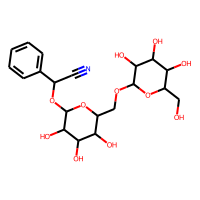
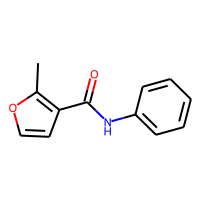
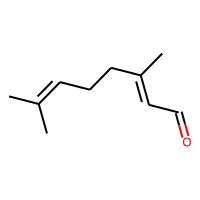
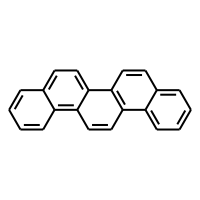
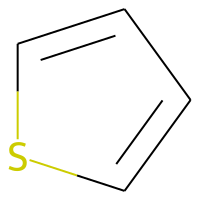

In [37]:
PandasTools.AddMoleculeColumnToFrame(df, 'smiles','Molecule')
df.head()

In [38]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True

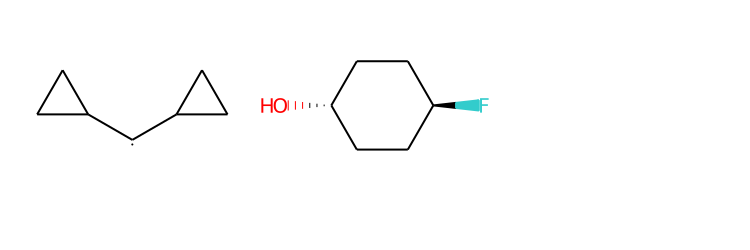

In [39]:
# Default Representation uses legacy FindMolChiralCenters() code
m1 = Chem.MolFromSmiles('C1CC1[C@H]C1CC1')
m2 = Chem.MolFromSmiles('F[C@H]1CC[C@H](O)CC1')
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

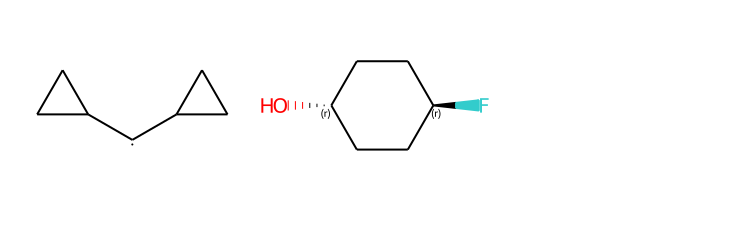

In [40]:
# new stereochemistry code with more accurate CIP labels, 2020.09 release
from rdkit.Chem import rdCIPLabeler
rdCIPLabeler.AssignCIPLabels(m1)
rdCIPLabeler.AssignCIPLabels(m2)
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

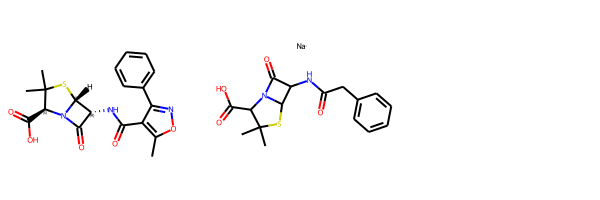

In [41]:
ms = [Chem.MolFromSmiles(x) for x in ('Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12','CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]')]
Draw.MolsToGridImage(ms)

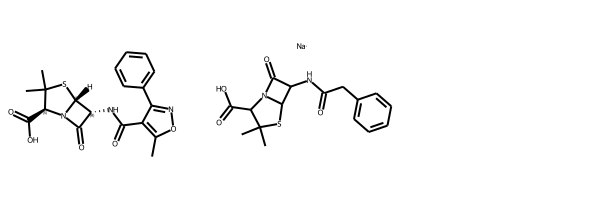

In [42]:
IPythonConsole.drawOptions.useBWAtomPalette()
Draw.MolsToGridImage(ms)

In [43]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
print(m.GetSubstructMatches(substructure))

((3, 4, 5), (8, 9, 7))


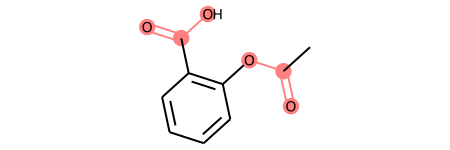

In [44]:
m

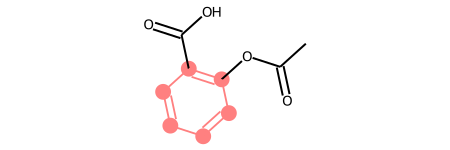

In [45]:
m.__sssAtoms = [0,1,2,6,11,12]
m

In [46]:
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.drawOptions.minFontSize=20
mol1 = Chem.MolFromSmiles('FC1=CC=C2C(=C1)C=NN2')
mol2 = Chem.MolFromSmiles('CCC1=C2NN=CC2=CC(Cl)=C1')

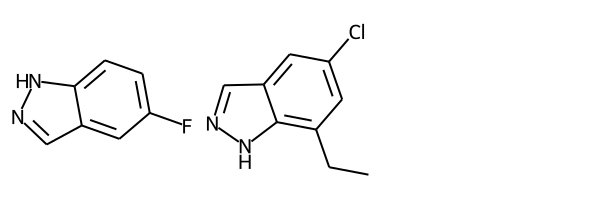

In [47]:
Draw.MolsToGridImage([mol1, mol2])

In [48]:
def view_difference(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1, mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    return Draw.MolsToGridImage([mol1, mol2], highlightAtomLists=[target_atm1, target_atm2])

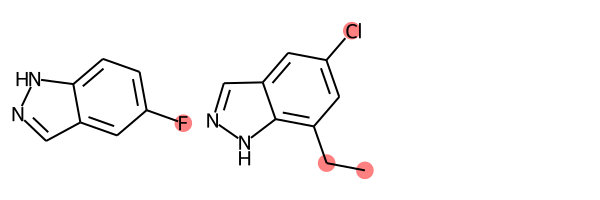

In [49]:
view_difference(mol1, mol2)

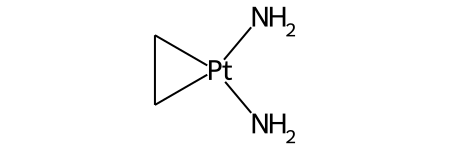

In [50]:
# Without Implicit Hydrogens
# Draw a molecule without implicit hydrogens

m = Chem.MolFromSmiles('[Pt](C1)(C1)(N)N')
m

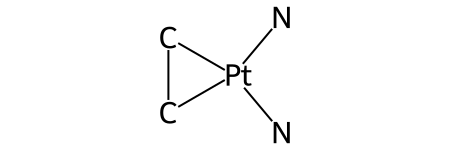

In [52]:
for atom in m.GetAtoms():
    atom.SetProp("atomLabel", atom.GetSymbol())
m

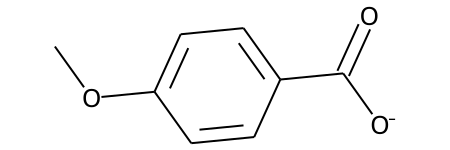

In [55]:
# With Abbreviation
# Draw a molecule with functional group abbreviations
from rdkit.Chem import rdAbbreviations
m = Chem.MolFromSmiles('COc1ccc(C(=O)[O-])cc1')
m

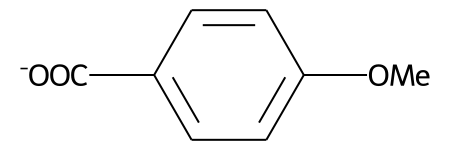

In [56]:
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
nm = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs)
nm

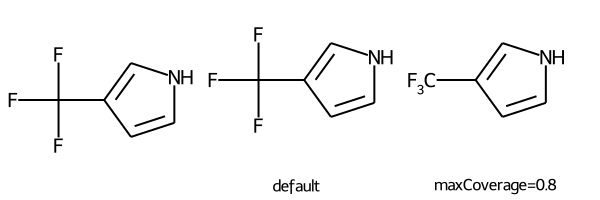

In [57]:
# Abbreviations that cover more than 40% of the molecule won't be applied by default
m = Chem.MolFromSmiles('c1c[nH]cc1C(F)(F)F')
nm1 = rdAbbreviations.CondenseMolAbbreviations(m, abbrevs)
nm2 = rdAbbreviations.CondenseMolAbbreviations(m, abbrevs, maxCoverage=0.8)
Draw.MolsToGridImage((m, nm1, nm2), legends=("", 'default','maxCoverage=0.8'))

In [58]:
# See available abbreviations
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
for a in abbrevs:
    print(a.label)

CO2Et
COOEt
OiBu
nDec
nNon
nOct
nHept
nHex
nPent
iPent
tBu
iBu
nBu
iPr
nPr
Et
NCF3
CF3
CCl3
CN
NC
N(OH)CH3
NO2
NO
SO3H
CO2H
COOH
OEt
OAc
NHAc
Ac
CHO
NMe
SMe
OMe
CO2-
COO-


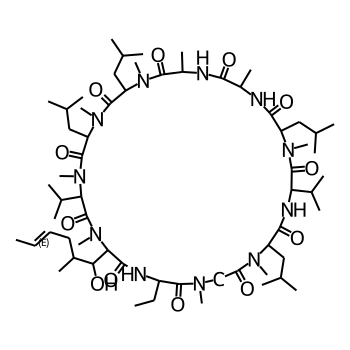

In [60]:
# Using CoordGen Library
# Draw a molecule using Coordgen Library
"""Some molecules like macrocycles are not represented well using the default 
RDKit drawing code. As a result, it may be preferable to use the Coordgen integration."""
# default drawing
IPythonConsole.molSize = 350,350
mol = Chem.MolFromSmiles("C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C")
mol

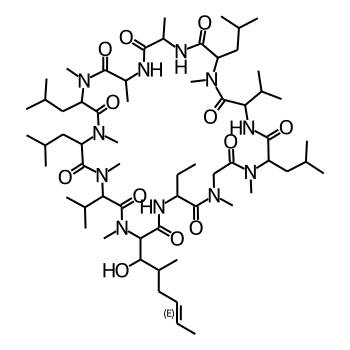

In [61]:
# with CoordGen
from rdkit.Chem import rdCoordGen
rdCoordGen.AddCoords(mol)
mol

In [62]:
# it is also possible to use CoordGen with the MOlDraw2D class. Here is one way to do that:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

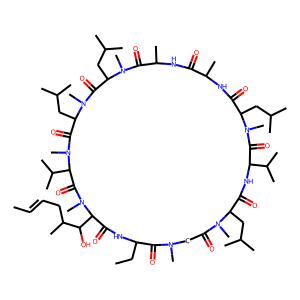

In [63]:
mol = Chem.MolFromSmiles("C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C")
drawer = rdMolDraw2D.MolDraw2DSVG(300,300)
drawer.drawOptions().addStereoAnnotation = False
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
SVG(drawer.GetDrawingText())

In [64]:
# On a Plot
# Draw a molecule on a matplotlib plot
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [65]:
x = np.arange(0,180,1)
y = np.sin(x)

In [66]:
mol = Chem.MolFromSmiles('C1CNCCC1C(=O)C')
im = Chem.Draw.MolToImage(mol)

(-0.5, 299.5, 299.5, -0.5)

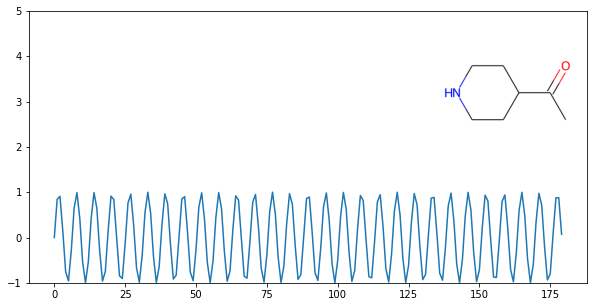

In [67]:
fig = plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.ylim(-1,5)
ax = plt.axes([0.6, 0.47, 0.38, 0.38], frameon=True)
ax.imshow(im)
ax.axis('off')

In [68]:
# Bonds and Bonding
# Get hybridization type and count
from rdkit import Chem
m = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")
for x in m.GetAtoms():
    print(x.GetIdx(), x.GetHybridization())

0 SP3
1 SP2
2 SP2
3 SP2
4 SP2
5 SP2
6 SP2
7 SP2
8 SP2
9 SP2
10 SP2
11 SP2
12 SP3
13 SP3


In [69]:
# for counting the hybridization type 
m = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
print(sum((x.GetHybridization() == Chem.HybridizationType.SP3) for x in m.GetAtoms()))

3


In [72]:
# Rings, Aromaticity, and Kekulization
# ring systems in a molecule
def GetRingSystems(mol, includeSpiro=False):
    ri = mol.GetRingInfo()
    systems = []
    for ring in ri.AtomRings():
        ringAts = set(ring)
        nSystems = []
        for system in systems:
            nInCommon = len(ringAts.intersection(system))
            if nInCommon and (includeSpiro or nInCommon>1):
                ringAts = ringAts.union(system)
            else:
                nSystems.append(system)
        nSystems.append(ringAts)
        systems = nSystems
    return systems
mol = Chem.MolFromSmiles('CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3')
print(GetRingSystems(mol))

[{1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12}, {14, 15, 16, 17, 18, 19}]


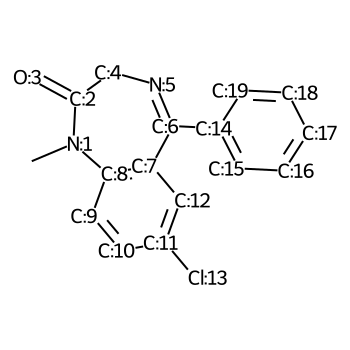

In [73]:
# Draw molecule with atom index
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol
mol_with_atom_index(mol)

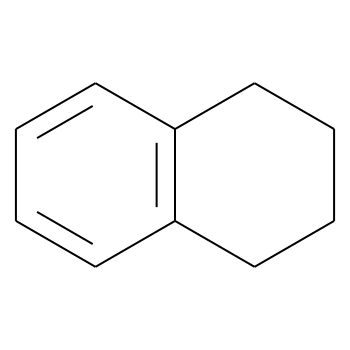

In [74]:
# Identify Aromatic Rings
# Identify which rings are aromatic in a molecule
m = Chem.MolFromSmiles('c1cccc2c1CCCC2')
m

In [75]:
ri= m.GetRingInfo()
# You can interrogate the RingInfo object to tell you the atoms that make up each ring:
print(ri.AtomRings())

((0, 5, 4, 3, 2, 1), (6, 7, 8, 9, 4, 5))


In [76]:
# or the bonds that make up each ring:
print(ri.BondRings())

((9, 4, 3, 2, 1, 0), (6, 7, 8, 10, 4, 5))


In [77]:
# To detect aromatic rings, I would loop over the bonds in each ring and flag 
# the ring as aromatic if all bonds are aromatic:
def isRingAromatic(mol, bondRing):
    for id in bondRing:
        if not mol.GetBondWithIdx(id).GetIsAromatic():
            return False
    return True

In [78]:
print(isRingAromatic(m, ri.BondRings()[0]))

True


In [80]:
print(isRingAromatic(m, ri.BondRings()[1]))

False


In [1]:
# Identify Aromatic Atoms
# Differentiate aromatic carbon from olefinic carbon with SMARTS
from rdkit import Chem
mol = Chem.MolFromSmiles("c1ccccc1C=CCC")
aromatic_carbon = Chem.MolFromSmarts("c")
print(mol.GetSubstructMatches(aromatic_carbon))

((0,), (1,), (2,), (3,), (4,), (5,))


In [2]:
# The RDKit includes a SMARTS extension that allows hybridization queries,
# here we query for SP2 aliphatic carboons:
olefinic_carbon = Chem.MolFromSmarts("[C^2]")
print(mol.GetSubstructMatches(olefinic_carbon))

((6,), (7,))


In [3]:
# There is also an alternative, more efficient approach, using the rdqueries module:

In [4]:
from rdkit import Chem
from rdkit.Chem import rdqueries

In [5]:
mol = Chem.MolFromSmiles("c1ccccc1C=CCC")
q = rdqueries.IsAromaticQueryAtom()
print([x.GetIdx() for x in mol.GetAtomsMatchingQuery(q)])

[0, 1, 2, 3, 4, 5]


In [6]:
q = rdqueries.HybridizationEqualsQueryAtom(Chem.HybridizationType.SP2)
print([x.GetIdx() for x in mol.GetAtomsMatchingQuery(q)])

[0, 1, 2, 3, 4, 5, 6, 7]


In [9]:
qcombined = rdqueries.IsAliphaticQueryAtom()
qcombined.ExpandQuery(q)
print([x.GetIdx() for x in mol.GetAtomsMatchingQuery(qcombined)])

[6, 7]


In [10]:
# Stereochemistry
# Find chiral centers and double bond stereochemistry
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = False
IPythonConsole.molSize = 200, 200

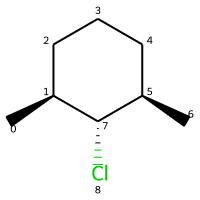

In [11]:
m = Chem.MolFromSmiles("C[C@H]1CCC[C@@H](C)[C@@H]1Cl")
m

In [12]:
# legacy FindMolChiralCenters()
print(Chem.FindMolChiralCenters(m, force=True, includeUnassigned=True, useLegacyImplementation=True))

[(1, 'S'), (5, 'R'), (7, 'R')]


In [13]:
# new stereochemistry code
print(Chem.FindMolChiralCenters(m,force=True,useLegacyImplementation=False))

[(1, 'S'), (5, 'R'), (7, 'r')]


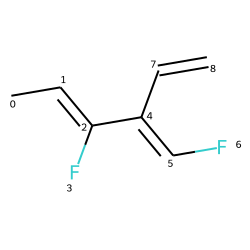

In [14]:
# Identifying Double Bond Stereochemistry
IPythonConsole.molSize = 250,250
mol = Chem.MolFromSmiles("C\C=C(/F)\C(=C\F)\C=C")
mol

In [15]:
# Using GetStereo()
for b in mol.GetBonds():
    print(b.GetBeginAtomIdx(), b.GetEndAtomIdx(),
         b.GetBondType(), b.GetStereo())

0 1 SINGLE STEREONONE
1 2 DOUBLE STEREOZ
2 3 SINGLE STEREONONE
2 4 SINGLE STEREONONE
4 5 DOUBLE STEREOE
5 6 SINGLE STEREONONE
4 7 SINGLE STEREONONE
7 8 DOUBLE STEREONONE


In [16]:
# Double bond configuration can also be identified with new stereochemistry
# code using Chem.FindPotentialStereo()

si = Chem.FindPotentialStereo(mol)
for element in si:
    print(f' Type: {element.type}, which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor}')
    

 Type: Bond_Double, which: 1, Specified: Specified, Descriptor: Bond_Cis
 Type: Bond_Double, which: 4, Specified: Specified, Descriptor: Bond_Trans


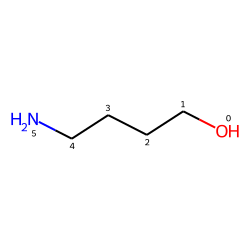

In [18]:
# Manipulating Molecules
# Create Fragments of molecules on bonds
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
# I have put explicit bonds in the SMILES definition to facinitate comprehension:
mol = Chem.MolFromSmiles("O-C-C-C-C-N")
mol1 = Chem.Mol(mol)
mol2 = Chem.Mol(mol)
mol1

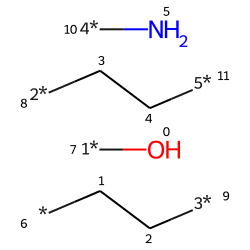

In [19]:
# Chem.FragmentOnBonds() will fragment all specified bond indices at once, and return a single molecule
# with all specified cuts applied. By default, addDummies = True, so empty valences are filled with dummy atoms:
mol1_f = Chem.FragmentOnBonds(mol1,(0,2,4))
mol1_f

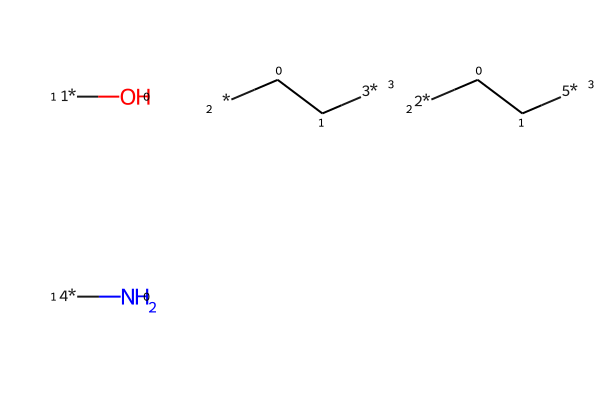

In [20]:
# The aboe modecule can be split into individual fragments using Chem.GetFrags():
MolsToGridImage(Chem.GetMolFrags(mol1_f, asMols=True))

In [21]:
# Chem.FragmentOnSomeBonds() will fragment according to all permutations of numToBreak bonds at a time,
# (numToBreak defaults to 1), and return tuple of molecules with numToBreak cuts applied. By default, 
# addDummies=True, so empty valences are filled with dummy atoms:
mol2_f_tuple = Chem.FragmentOnSomeBonds(mol2, (0, 2, 4))

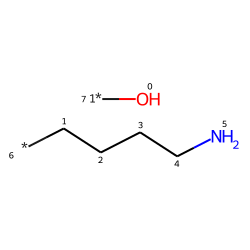

In [22]:
mol2_f_tuple[0]

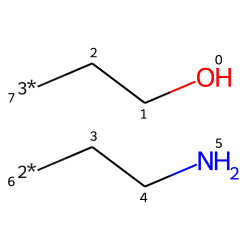

In [23]:
mol2_f_tuple[1]

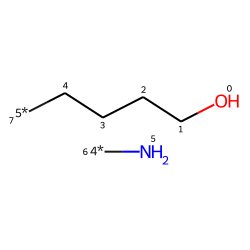

In [24]:
mol2_f_tuple[2]

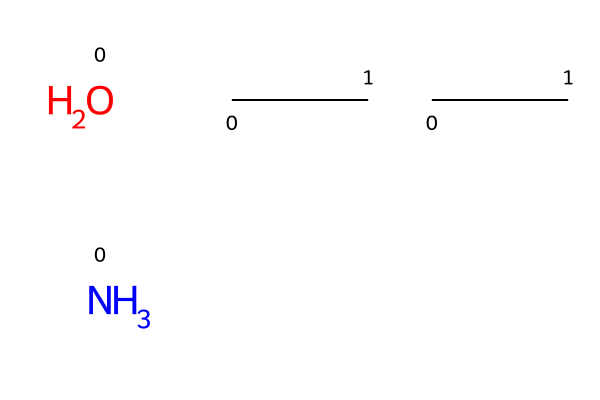

In [25]:
# At last, we can manually cut bonds using Chem.RWMol.RemoveBonds:
with Chem.RWMol(mol) as rwmol:
    for b_idx in [0, 2, 4]:
        b = rwmol.GetBondWithIdx(b_idx)
        rwmol.RemoveBond(b.GetBeginAtomIdx(), b.GetEndAtomIdx())
# And after that we call Chem.GetMolFrags() to get sanitized fragments where empty valences were filled with implicit hydrogens:
MolsToGridImage(Chem.GetMolFrags(rwmol, asMols=True))

In [1]:
# Largest Fragment
# Select largest fragment from a molecule

from rdkit import Chem
from rdkit.Chem import rdmolops
mol = Chem.MolFromSmiles('CCOC(=O)C(C)(C)OC1=CC=C(C=C1)Cl.CO.C1=CC(=CC=C1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCC2=CN=C3C(=N2)C(=O)NC(=N3)N')

In [4]:
mol_frags = rdmolops.GetMolFrags(mol, asMols = True)
largest_mol = max(mol_frags, default=mol, key=lambda m: m.GetNumAtoms())
print(Chem.MolToSmiles(largest_mol))

ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.GetMolFrags(NoneType)
did not match C++ signature:
    GetMolFrags(class RDKit::ROMol mol, bool asMols=False, bool sanitizeFrags=True, class boost::python::api::object frags=None, class boost::python::api::object fragsMolAtomMapping=None)

In [5]:
# The same result can also be achieved with MolStandardize:

from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
mol = Chem.MolFromSmiles('CCOC(=O)C(C)(C)OC1=CC=C(C=C1)Cl.CO.C1=CC(=CC=C1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCC2=CN=C3C(=N2)C(=O)NC(=N3)N')

In [6]:
# Setup standardization module
largest_Fragment = rdMolStandardize.LargestFragmentChooser()
largest_mol = largest_Fragment.choose(mol)
print(Chem.MolToSmiles(largest_mol))

Nc1nc2ncc(CNc3ccc(C(=O)N[C@@H](CCC(=O)O)C(=O)O)cc3)nc2c(=O)[nH]1


In [7]:
# Sidechain-Core Enumeration
# Replace sidechains on a core and enumerate the combinations

In [8]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

In [10]:
# core is '*c1c(C)cccc1(O)'
# Chain is 'CN*'

rxn = AllChem.ReactionFromSmarts('[c:1][#0].[#0][*:2]>>[c:1]-[*:2]')
reacts = (Chem.MolFromSmiles('*c1c(C)cccc1(O)'),Chem.MolFromSmiles('CN*'))
products = rxn.RunReactants(reacts) # tuple
print(len(products))

1


In [11]:
print(len(products[0]))

1


In [12]:
print(Chem.MolToSmiles(products[0][0]))  # [0][0] to index out the rdchem mol object

CNc1c(C)cccc1O


In [14]:
# The above reaction-based approach is flexible, however if we can generate our
# sidechains in such a way that the atom we want to attach to the core
# is the first one (atom zero), 
# for this we have to do a simple kind of replacement:

core = Chem.MolFromSmiles('*c1c(C)cccc1(O)')
chain = Chem.MolFromSmiles('NC')
products = Chem.ReplaceSubstructs(core,Chem.MolFromSmarts('[#0]'), chain) #tuple
print(Chem.MolToSmiles(products[0]))

CNc1c(C)cccc1O


In [16]:
# Here is an example in a loop for an imidazolium core with alkyl chains
 
core = Chem.MolFromSmiles('*[n+]1cc[nH]c1')
chains = ['C','CC','CCC','CCCC','CCCCC','CCCCCC']
chainMols = [Chem.MolFromSmiles(chain) for chain in chains]

product_smi = []
for chainMol in chainMols:
    product_mol = Chem.ReplaceSubstructs(core,Chem.MolFromSmarts('[#0]'),chainMol)
    product_smi.append(Chem.MolToSmiles(product_mol[0]))
print(product_smi)

['C[n+]1cc[nH]c1', 'CC[n+]1cc[nH]c1', 'CCC[n+]1cc[nH]c1', 'CCCC[n+]1cc[nH]c1', 'CCCCC[n+]1cc[nH]c1', 'CCCCCC[n+]1cc[nH]c1']


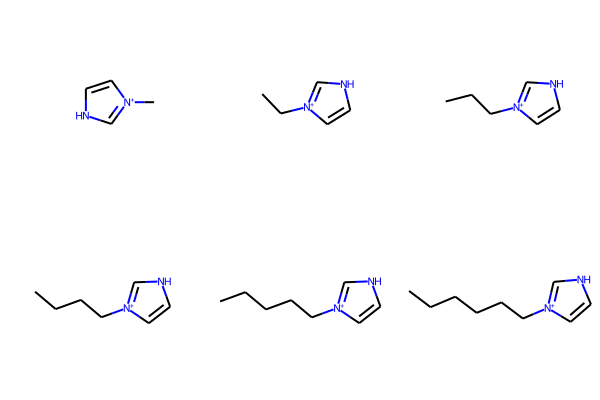

In [17]:
# View the enumerated molecules:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in product_smi])

In [19]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw


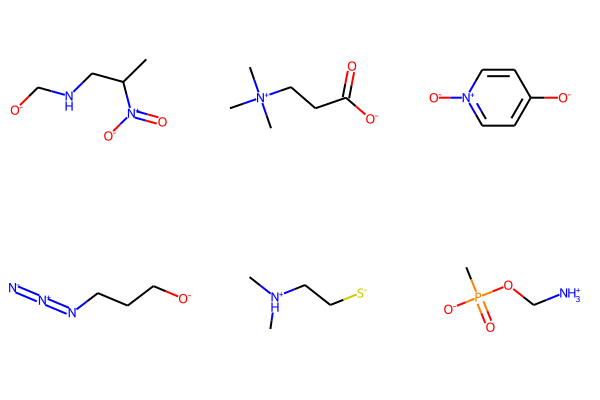

In [21]:
# Lists of SMILES
smiList = ['CC(CNC[O-])[N+]([O-])=O',
       'C[N+](C)(C)CCC([O-])=O',
       '[O-]C1=CC=[N+]([O-])C=C1',
       '[O-]CCCN=[N+]=[N-]',
       'C[NH+](C)CC[S-]',
       'CP([O-])(=O)OC[NH3+]']

# Create RDKit molecular objects
mols = [Chem.MolFromSmiles(m) for m in smiList]


# Display
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200))

In [22]:
def neutralize_atoms(mol):
    pattern = Chem.MolFromSmarts("[+1!h0$([*]~[-1,-2,-3,-4]),-1!$([*]~[+1,+2,+3,+4])]")
    at_matches = mol.GetSubstructMatches(pattern)
    at_matches_list = [y[0] for y in at_matches]
    if len(at_matches_list) > 0:
        for at_idx in at_matches_list:
            atom = mol.GetAtomWithIdx(at_idx)
            chg = atom.GetFormalCharge()
            hcount = atom.GetTotalNumHs()
            atom.SetFormalCharge(0)
            atom.SetNumExplicitHs(hcount - chg)
            atom.UpdatePropertyCache()
    return mol

In [23]:
# Neutralize molecules by atom
for mol in mols:
    neutralize_atoms(mol)
    print(Chem.MolToSmiles(mol))

CC(CNCO)[N+](=O)[O-]
C[N+](C)(C)CCC(=O)O
[O-][n+]1ccc(O)cc1
[N-]=[N+]=NCCCO
C[NH+](C)CCS
CP(=O)(O)OC[NH3+]


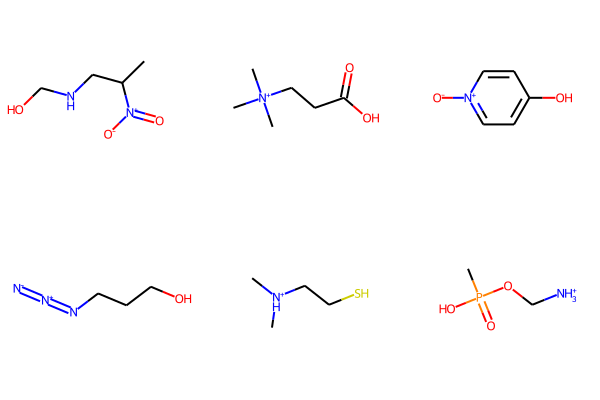

In [24]:
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200))

In [28]:
# comparing to "rdMolStandardize.Uncharger" results:

from rdkit.Chem.MolStandardize import rdMolStandardize
un = rdMolStandardize.Uncharger()
mols2 = [Chem.MolFromSmiles(m) for m in smiList]

for mol2 in mols2:
    un.uncharge(mol2)
    print(Chem.MolToSmiles(mol2))

CC(CNC[O-])[N+](=O)[O-]
C[N+](C)(C)CCC(=O)[O-]
[O-]c1cc[n+]([O-])cc1
[N-]=[N+]=NCCC[O-]
C[NH+](C)CC[S-]
CP(=O)([O-])OC[NH3+]


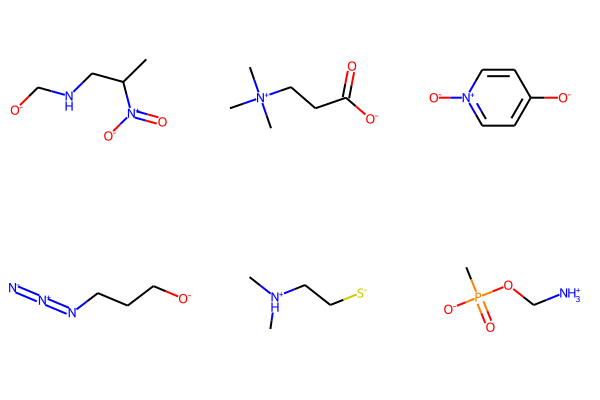

In [30]:
Draw.MolsToGridImage(mols2,molsPerRow=3,subImgSize=(200,200))

In [31]:
# Substructure Matching
# Match a functional group (e.g., alcohol) with a SMARTS query

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sucrose = "C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O[C@]2([C@H]([C@@H]([C@H](O2)CO)O)O)CO)O)O)O)O"
sucrose_mol = Chem.MolFromSmiles(sucrose)
primary_alcohol = Chem.MolFromSmarts("[CH2][OH1]")
print(sucrose_mol.GetSubstructMatches(primary_alcohol))

((0, 22), (13, 14), (17, 18))


In [33]:
secondary_alcohol = Chem.MolFromSmarts("[CH1][OH1]")
print(sucrose_mol.GetSubstructMatches(secondary_alcohol))

((2, 21), (3, 20), (4, 19), (9, 16), (10, 15))


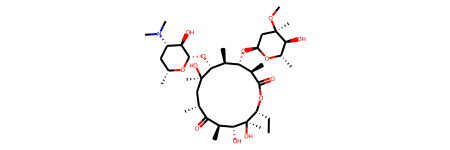

In [5]:
# Macrocycles with SMARTS queries
# Match a macrocycle ring with a SMARTS query
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
erythromycin = Chem.MolFromSmiles("CC[C@@H]1[C@@]([C@@H]([C@H](C(=O)[C@@H](C[C@@]([C@@H]([C@H]([C@@H]([C@H](C(=O)O1)C)O[C@H]2C[C@@]([C@H]([C@@H](O2)C)O)(C)OC)C)O[C@H]3[C@@H]([C@H](C[C@H](O3)C)N(C)C)O)(C)O)C)C)O)(C)O")
erythromycin

In [6]:
# Define SMARTS pattern with ring size > 12
# This is an RDKit SMARTS extension
macro = Chem.MolFromSmarts("[r{12-}]")
print(erythromycin.GetSubstructMatches(macro))

((2,), (3,), (4,), (5,), (6,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (17,))


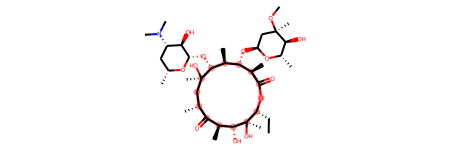

In [7]:
erythromycin

In [8]:
# Returing Substructure Matches as SMILES
# Obtain SMILES of the matched substructre
from rdkit import Chem
pat = Chem.MolFromSmarts("[NX1]#[CX2]") # matches nitrile
mol = Chem.MolFromSmiles("CCCC#N") # Butyronitrile
atom_indices = mol.GetSubstructMatch(pat)
print(atom_indices)

(4, 3)


In [9]:
print(Chem.MolFragmentToSmiles(mol, atom_indices)) # returns the nitrile

C#N


In [10]:
# if only the atom indices are given then Chem.MolFragmentToSmiles() will include all bonds
# which connect those atoms, even if the original SMARTS does not match those bonds. For example:
pat = Chem.MolFromSmarts("*~*~*~*") # match 4 linear atoms
mol = Chem.MolFromSmiles("C1CCC1") # ring of size 4
atom_indices = mol.GetSubstructMatch(pat)
print(atom_indices)

(0, 1, 2, 3)


In [11]:
print(Chem.MolFragmentToSmiles(mol, atom_indices)) # returns the ring

C1CCC1


In [12]:
def get_match_bond_indices(query, mol, match_atom_indices):
    bond_indices = []
    for query_bond in query.GetBonds():
        atom_index1 = match_atom_indices[query_bond.GetBeginAtomIdx()]
        atom_index2 = match_atom_indices[query_bond.GetEndAtomIdx()]
        bond_indices.append(mol.GetBondBetweenAtoms(
        atom_index1, atom_index2).GetIdx())
    return bond_indices

In [14]:
bond_indices = get_match_bond_indices(pat, mol, atom_indices)
print(bond_indices)

[0, 1, 2]


In [15]:
print(Chem.MolFragmentToSmiles(mol, atom_indices, bond_indices))

CCCC


In [16]:
# With the Same Fragment
# Match a pattern only within the same fragment

In [17]:
from rdkit import Chem
p = Chem.MolFromSmarts('O.N')

In [18]:
def fragsearch(m,p):
    matches = [set(x) for x in m.GetSubstructMatches(p)]
    frags = [set(y) for y in Chem.GetMolFrags(m)] # had to add this line for code to work
    for frag in frags:
        for match in matches:
            if match.issubset(frag):
                return match
    return False

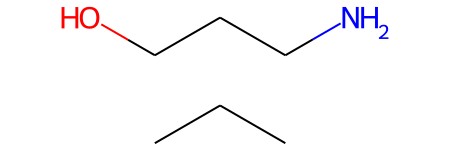

In [21]:
m1 = Chem.MolFromSmiles('OCCCN.CCC')
m1

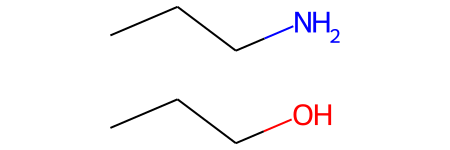

In [22]:
m2 = Chem.MolFromSmiles('OCCC.CCCN')
m2

In [23]:
print(m1.HasSubstructMatch(p))

True


In [24]:
print(m2.HasSubstructMatch(p))

True


In [25]:
print(fragsearch(m1,p))

{0, 4}


In [26]:
print(fragsearch(m2,p))

False


In [27]:
# Descriptor Calculations
# Calculate hash strings for molecules with the NextMove MolHash functionality within RDKit.
from rdkit import Chem
from rdkit.Chem import rdMolHash
import rdkit

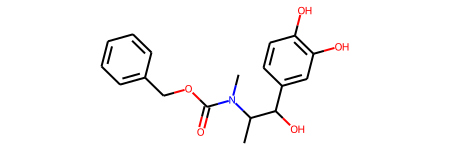

In [28]:
s = Chem.MolFromSmiles('CC(C(C1=CC(=C(C=C1)O)O)O)N(C)C(=O)OCC2=CC=CC=C2')
s

In [29]:
# view all of the MolHash hashing functions types with the names method.
molhashf = rdMolHash.HashFunction.names
print(molhashf)

{'AnonymousGraph': rdkit.Chem.rdMolHash.HashFunction.AnonymousGraph, 'ElementGraph': rdkit.Chem.rdMolHash.HashFunction.ElementGraph, 'CanonicalSmiles': rdkit.Chem.rdMolHash.HashFunction.CanonicalSmiles, 'MurckoScaffold': rdkit.Chem.rdMolHash.HashFunction.MurckoScaffold, 'ExtendedMurcko': rdkit.Chem.rdMolHash.HashFunction.ExtendedMurcko, 'MolFormula': rdkit.Chem.rdMolHash.HashFunction.MolFormula, 'AtomBondCounts': rdkit.Chem.rdMolHash.HashFunction.AtomBondCounts, 'DegreeVector': rdkit.Chem.rdMolHash.HashFunction.DegreeVector, 'Mesomer': rdkit.Chem.rdMolHash.HashFunction.Mesomer, 'HetAtomTautomer': rdkit.Chem.rdMolHash.HashFunction.HetAtomTautomer, 'HetAtomProtomer': rdkit.Chem.rdMolHash.HashFunction.HetAtomProtomer, 'RedoxPair': rdkit.Chem.rdMolHash.HashFunction.RedoxPair, 'Regioisomer': rdkit.Chem.rdMolHash.HashFunction.Regioisomer, 'NetCharge': rdkit.Chem.rdMolHash.HashFunction.NetCharge, 'SmallWorldIndexBR': rdkit.Chem.rdMolHash.HashFunction.SmallWorldIndexBR, 'SmallWorldIndexBRL': r

In [30]:
# Generating MolHashes for molecules 's' with all defined hash functions.
for i, j in molhashf.items():
    print(i, rdMolHash.MolHash(s, j))

AnonymousGraph **(***1*****1)*(*)*(*)*(*)*1***(*)*(*)*1
ElementGraph CC(C(O)C1CCC(O)C(O)C1)N(C)C(O)OCC1CCCCC1
CanonicalSmiles CC(C(O)c1ccc(O)c(O)c1)N(C)C(=O)OCc1ccccc1
MurckoScaffold c1ccc(CCNCOCc2ccccc2)cc1
ExtendedMurcko *c1ccc(C(*)C(*)N(*)C(=*)OCc2ccccc2)cc1*
MolFormula C18H21NO5
AtomBondCounts 24,25
DegreeVector 0,8,10,6
Mesomer CC(C(O)[C]1[CH][CH][C](O)[C](O)[CH]1)N(C)[C]([O])OC[C]1[CH][CH][CH][CH][CH]1_0
HetAtomTautomer CC(C([O])[C]1[CH][CH][C]([O])[C]([O])[CH]1)N(C)[C]([O])OC[C]1[CH][CH][CH][CH][CH]1_3_0
HetAtomProtomer CC(C([O])[C]1[CH][CH][C]([O])[C]([O])[CH]1)N(C)[C]([O])OC[C]1[CH][CH][CH][CH][CH]1_3
RedoxPair CC(C(O)[C]1[CH][CH][C](O)[C](O)[CH]1)N(C)[C]([O])OC[C]1[CH][CH][CH][CH][CH]1
Regioisomer *C.*CCC.*O.*O.*O.*OC(=O)N(*)*.C.c1ccccc1.c1ccccc1
NetCharge 0
SmallWorldIndexBR B25R2
SmallWorldIndexBRL B25R2L10
ArthorSubstructureOrder 00180019010012000600009b000000


In [31]:
mList = ['CCC1CC(CCC1=O)C(=O)C1=CC=CC(C)=C1','CCC1CC(CCC1=O)C(=O)C1=CC=CC=C1',\
         'CC(=C)C(C1=CC=CC=C1)S(=O)CC(N)=O','CC1=CC(=CC=C1)C(C1CCC(N)CC1)C(F)(F)F',\
         'CNC1CCC(C2=CC(Cl)=C(Cl)C=C2)C2=CC=CC=C12','CCCOC(C1CCCCC1)C1=CC=C(Cl)C=C1']

In [33]:
# Loop through the SMILES mList and create RDKit molecular objects.
mMols = [Chem.MolFromSmiles(m) for m in mList]
# Calculate Murcko Scaffold Hashes
murckoHashList = [rdMolHash.MolHash(mMol, rdkit.Chem.rdMolHash.HashFunction.MurckoScaffold) for mMol in mMols]
print(murckoHashList)

['c1ccc(CC2CCCCC2)cc1', 'c1ccc(CC2CCCCC2)cc1', 'c1ccccc1', 'c1ccc(CC2CCCCC2)cc1', 'c1ccc(C2CCCc3ccccc32)cc1', 'c1ccc(CC2CCCCC2)cc1']


In [34]:
# Get the most frequent Murcko Scaffold Hash
def mostFreq(list):
    return max(set(list), key=list.count)
mostFreq_murckoHash = mostFreq(murckoHashList)
print(mostFreq_murckoHash)

c1ccc(CC2CCCCC2)cc1


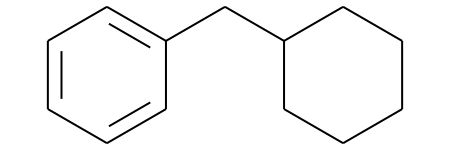

In [35]:
mostFreq_murckoHash_mol = Chem.MolFromSmiles('c1ccc(CC2CCCCC2)cc1')
mostFreq_murckoHash_mol

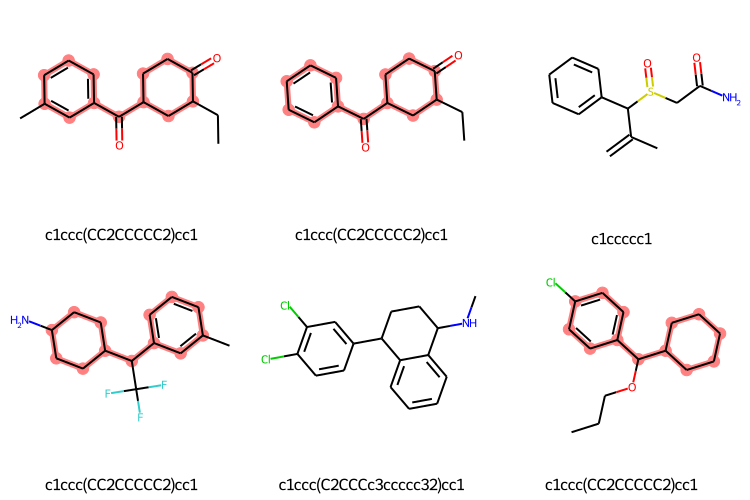

In [38]:
# Display Molecules with MurkoHash as legends and highlight the mostFreq_murckoHash
highlight_mostFreq_murckoHash = [mMol.GetSubstructMatch(mostFreq_murckoHash_mol) for mMol in mMols]
Draw.MolsToGridImage(mMols, legends=[murckoHash for murckoHash in murckoHashList],
                    highlightAtomLists = highlight_mostFreq_murckoHash,
                    subImgSize=(250,250), useSVG=False)

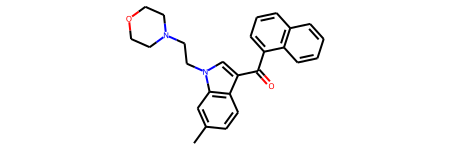

In [39]:
r0 = Chem.MolFromSmiles('CC1=CC2=C(C=C1)C(=CN2CCN1CCOCC1)C(=O)C1=CC=CC2=C1C=CC=C2')
r0

In [40]:
r0_regioHash = rdMolHash.MolHash(r0, rdkit.Chem.rdMolHash.HashFunction.Regioisomer)
print(r0_regioHash)

*C.*C(*)=O.*CC*.C1COCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1


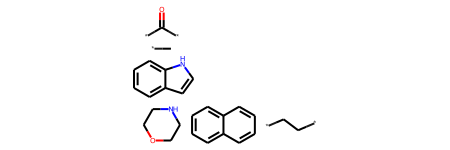

In [42]:
r0_regioHash_mol = Chem.MolFromSmiles('*C.*C(*)=O.*CC*.C1COCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1')
r0_regioHash_mol

In [43]:
rList = ['CC1=CC2=C(C=C1)C(=CN2CCN1CCOCC1)C(=O)C1=CC=CC2=C1C=CC=C2',\
        'CCCCCN1C=C(C2=CC=CC=C21)C(=O)C3=CC=CC4=CC=CC=C43',\
        'CC1COCCN1CCN1C=C(C(=O)C2=CC=CC3=C2C=CC=C3)C2=C1C=CC=C2',\
         'CC1=CC=C(C(=O)C2=CN(CCN3CCOCC3)C3=C2C=CC=C3)C2=C1C=CC=C2',\
        'CC1=C(CCN2CCOCC2)C2=C(C=CC=C2)N1C(=O)C1=CC=CC2=CC=CC=C12',\
        'CN1CCN(C(C1)CN2C=C(C3=CC=CC=C32)C(=O)C4=CC=CC5=CC=CC=C54)C']

rMols = [Chem.MolFromSmiles(r) for r in rList]

In [44]:
# Calculating the Regioisomer Hashes
regioHashList = [rdMolHash.MolHash(rMol, rdkit.Chem.rdMolHash.HashFunction.Regioisomer) for rMol in rMols]
print(regioHashList)

['*C.*C(*)=O.*CC*.C1COCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1', '*C(*)=O.*CCCCC.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1', '*C.*C(*)=O.*CC*.C1COCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1', '*C.*C(*)=O.*CC*.C1COCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1', '*C.*C(*)=O.*CC*.C1COCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1', '*C.*C.*C(*)=O.*C*.C1CNCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1']


In [45]:
rmatches = []
for regioHash in regioHashList:
    if regioHash == r0_regioHash:
        print('Regioisomer: True')
        rmatches.append('Regioisomer: True')
    else:
        print('Regioisomer: False')
        rmatches.append('Regioisomer: False')

Regioisomer: True
Regioisomer: False
Regioisomer: True
Regioisomer: True
Regioisomer: True
Regioisomer: False


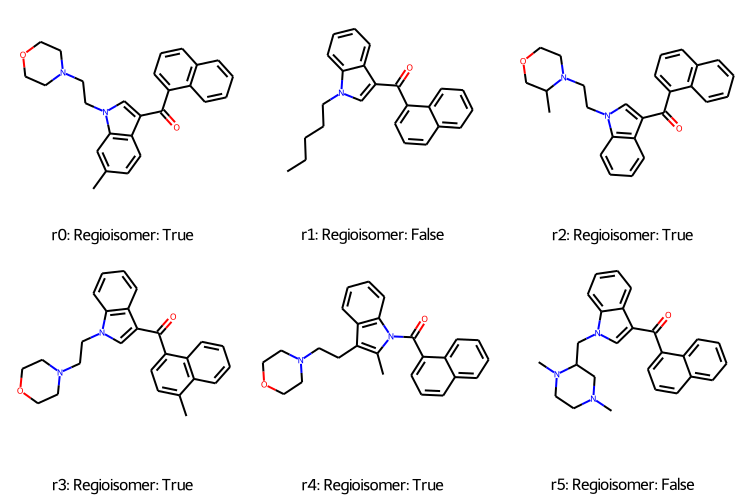

In [46]:
# Create some labels
index = ['r0: ', 'r1: ', 'r2: ', 'r3: ', 'r4: ', 'r5: ']
labelList = [rmatches + index for rmatches,index in zip(index,rmatches)]
# Display molecules with labels
Draw.MolsToGridImage(rMols, legends=[label for label in labelList],
                    subImgSize=(250,250), useSVG=False)


In [1]:
# Contiguous Rotable Bonds
# Calculate the largest number of contiguous rotable bonds.
from rdkit import Chem
from rdkit.Chem.Lipinski import RotatableBondSmarts

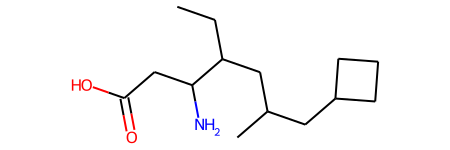

In [2]:
mol = Chem.MolFromSmiles('CCC(CC(C)CC1CCC1)C(CC(=O)O)N')
mol

In [5]:
def find_bond_groups(mol):
    rot_atom_pairs = mol.GetSubstructMatches(RotatableBondSmarts)
    rot_bond_set = set([mol.GetBondBetweenAtoms(*ap).GetIdx() for ap in rot_atom_pairs])
    rot_bond_groups = []
    while (rot_bond_set):
        i = rot_bond_set.pop()
        connected_bond_set = set([i])
        stack = [i]
        while (stack):
            i = stack.pop()
            b = mol.GetBondWithIdx(i)
            bonds = []
            for a in (b.GetBeginAtom(), b.GetEndAtom()):
                bonds.extend([b.GetIdx() for b in a.GetBonds() if (
                    (b.GetIdx() in rot_bond_set) and (not (b.GetIdx() in connected_bond_set)))])
                connected_bond_set.update(bonds)
                stack.extend(bonds)
        rot_bond_set.difference_update(connected_bond_set)
        rot_bond_groups.append(tuple(connected_bond_set))
    return tuple(sorted(rot_bond_groups, reverse = True, key = lambda x: len(x)))

In [6]:
# Finding groups of contiguous rotatable bonds in mol
bond_groups = find_bond_groups(mol)
# because the bond groups are sorted by decreasing size, the size of the first group (if any)
# is the largest number of contiguous rotatable bonds in mol
largest_n_cont_rot_bonds = len(bond_groups[0]) if bond_groups else 0

In [7]:
print(largest_n_cont_rot_bonds)

8


In [8]:
print(bond_groups)

((1, 2, 3, 5, 6, 10, 11, 12),)


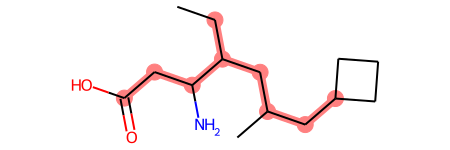

In [9]:
mol

In [10]:
# Writing Molecules
# Kekulize a molecule and write Kekule SMILES
from rdkit import Chem
smi = "CN1C(NC2=NC=CC=C2)=CC=C1"
mol = Chem.MolFromSmiles(smi)
print(Chem.MolToSmiles(mol))

Cn1cccc1Nc1ccccn1


In [12]:
Chem.Kekulize(mol)
print(Chem.MolToSmiles(mol, kekuleSmiles=True))

CN1C=CC=C1NC1=NC=CC=C1


In [13]:
# Isomeric SMILES without isotopes
# Write Isomeric SMILES without isotope information (i.e., only stereochemistry)

from rdkit import Chem
def MolWithoutIsotopesToSmiles(mol):
    atom_data = [(atom, atom.GetIsotope()) for atom in mol.GetAtoms()]
    for atom, isotope in atom_data:
        # restore original isotope values
        if isotope:
            atom.SetIsotope(0)
    smiles = Chem.MolToSmiles(mol)
    for atom, isotope in atom_data:
        if isotope:
            atom.SetIsotope(isotope)
    return smiles

mol = Chem.MolFromSmiles("[19F][13C@H]([16OH])[35Cl]")
print(MolWithoutIsotopesToSmiles(mol))

O[C@@H](F)Cl


In [16]:
# Reactions
# Decompose a reaction product into its reactants
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

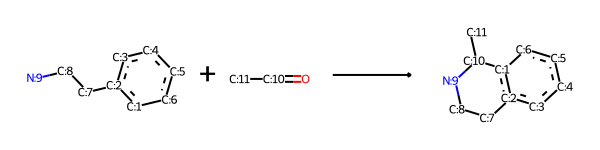

In [17]:
rxn = AllChem.ReactionFromSmarts('[cH1:1]1:[c:2](-[CH2:7]-[CH2:8]-[NH2:9]):[c:3]:[c:4]:[c:5]:[c:6]:1.[#6:11]-[CH1;R0:10]=[OD1]>>[c:1]12:[c:2](-[CH2:7]-[CH2:8]-[NH1:9]-[C:10]-2(-[#6:11])):[c:3]:[c:4]:[c:5]:[c:6]:1')
rxn

In [20]:
rxn2 = AllChem.ChemicalReaction()
for i in range(rxn.GetNumReactantTemplates()):
    rxn2.AddProductTemplate(rxn.GetReactantTemplate(i))
for i in range(rxn.GetNumProductTemplates()):
    rxn2.AddReactantTemplate(rxn.GetProductTemplate(i))
rxn2.Initialize()

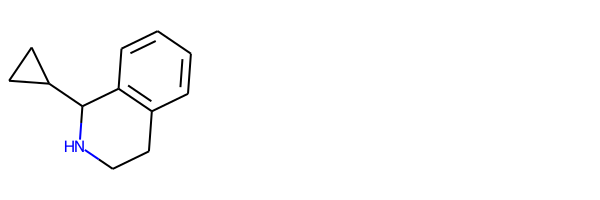

In [21]:
reacts = [Chem.MolFromSmiles(x) for x in ('NCCc1ccccc1','C1CC1C(=O)')]
ps = rxn.RunReactants(reacts)
ps0 = ps[0]
for p in ps0:
    Chem.SanitizeMol(p)
Draw.MolsToGridImage(ps0)

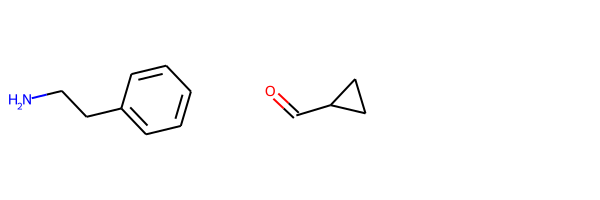

In [23]:
reacts = ps0
rps = rxn2.RunReactants(reacts)
rps0 = rps[0]
for rp in rps0:
    Chem.SanitizeMol(rp)
Draw.MolsToGridImage(rps0)

In [25]:
# Reaction Fingerprints and Similarity
# Reaction fingerprinting algorithm
from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem import DataStructs

In [26]:
# construct the chemical reactions
rxn1 = rdChemReactions.ReactionFromSmarts('CCCO>>CCC=O')
rxn2 = rdChemReactions.ReactionFromSmarts('CC(O)C>>CC(=O)C')
rxn3 = rdChemReactions.ReactionFromSmarts('NCCO>>NCC=O')

# construct difference fingerprint (subtracts reactant fingerprint from product)
fp1 = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn1)
fp2 = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn2)
fp3 = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn3)

print(DataStructs.TanimotoSimilarity(fp1,fp2))

0.0


In [27]:
# The similarity between fp1 and fp2 is zero because as far as the reaction
# fingerprint is concerned, the parts which change within the reactions have
# nothing in common with each other.
# In contrast, fp1 and fp3 have some common parts
print(DataStructs.TanimotoSimilarity(fp1, fp3))

0.42857142857142855


In [1]:
# Error Messages
# Create a mol object with skipping valence check, followed by a partial sanitization.
# N.B. Use caution, and make sure our molecules actually make sence before doing this!
from rdkit import Chem
m = Chem.MolFromSmiles('F[P-](F)(F)(F)(F)F.CN(C)C(F)=[N+](C)C', sanitize=False)

In [2]:
# a partial sanitization so the molecule is actually useful:
m.UpdatePropertyCache(strict=False)
Chem.SanitizeMol(m, Chem.SanitizeFlags.SANITIZE_FINDRADICALS | Chem.SanitizeFlags.SANITIZE_KEKULIZE|Chem.SanitizeFlags.SANITIZE_SETAROMATICITY|Chem.SanitizeFlags.SANITIZE_SETCONJUGATION|Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION|Chem.SanitizeFlags.SANITIZE_SYMMRINGS, catchErrors=True)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [3]:
# Detect Chemistry Problems
# Identify and capture error messages when creating mol objects.
from rdkit import Chem
m = Chem.MolFromSmiles('CN(C)(C)C', sanitize=False)
problems = Chem.DetectChemistryProblems(m)
print(len(problems))

1


In [4]:
print(problems[0].GetType())
print(problems[0].GetAtomIdx())
print(problems[0].Message())

AtomValenceException
1
Explicit valence for atom # 1 N, 4, is greater than permitted


In [5]:
m2 = Chem.MolFromSmiles('c1cncc1', sanitize=False)
problems = Chem.DetectChemistryProblems(m2)
print(len(problems))

1


In [6]:
print(problems[0].GetType())
print(problems[0].GetAtomIndices())
print(problems[0].Message())

KekulizeException
(0, 1, 2, 3, 4)
Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4



In [8]:
from rdkit import Chem
pyrrole = Chem.MolFromSmiles('C1=CNC=C1')
for atom in pyrrole.GetAtoms():
    print(atom.GetSymbol(), atom.GetExplicitValence(), atom.GetTotalNumHs())

C 3 1
C 3 1
N 3 1
C 3 1
C 3 1


In [9]:
pyrrole = Chem.MolFromSmiles('C1=CNC=C1')
mol1 = Chem.MolFromSmiles('C1=CNCC1')
mol2 = Chem.MolFromSmiles('C1=C[NH]CC1')

In [10]:
for atom in pyrrole.GetAtoms():
    print(atom.GetSymbol(), atom.GetExplicitValence(), atom.GetNumImplicitHs(), atom.GetNumExplicitHs(), atom.GetTotalNumHs())

C 3 1 0 1
C 3 1 0 1
N 3 0 1 1
C 3 1 0 1
C 3 1 0 1


In [12]:
for atom in mol1.GetAtoms():
    print(atom.GetSymbol(), atom.GetExplicitValence(), atom.GetNumImplicitHs(), atom.GetNumExplicitHs(), atom.GetTotalNumHs())

C 3 1 0 1
C 3 1 0 1
N 2 1 0 1
C 2 2 0 2
C 2 2 0 2


In [13]:
for atom in mol2.GetAtoms():
    print(atom.GetSymbol(), atom.GetExplicitValence(), atom.GetNumImplicitHs(), atom.GetNumExplicitHs(), atom.GetTotalNumHs())

C 3 1 0 1
C 3 1 0 1
N 3 0 1 1
C 2 2 0 2
C 2 2 0 2


In [1]:
# Wiener Index
# Calculate the Wiener index (a topological index of a molecule)
from rdkit import Chem
def wiener_index(m):
    res = 0
    amat = Chem.GetDistanceMatrix(m)
    num_atoms = m.GetNumAtoms()
    for i in range(num_atoms):
        for j in range(i+1, num_atoms):
            res += amat[i][j]
    return res

In [2]:
butane = Chem.MolFromSmiles('CCCC')
print(wiener_index(butane))

10.0


In [3]:
isobutane = Chem.MolFromSmiles('CC(C)C')
print(wiener_index(isobutane))

9.0


In [4]:
# Organometallics with Dative Bonds
# Process organometallic SMILES by detecting single bonds between metals and replacing
# with dative bonds.
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [5]:
def is_transition_metal(at):
    n = at.GetAtomicNum()
    return (n>=22 and n<=29) or (n>=40 and n<=47) or (n>=72 and n<=79)

def set_dative_bonds(mol, fromAtoms=(7, 8)):
    """
    convert some bonds to dative
    
    Replaces some single bonds between metals and atoms with atomic numbers is fomAtoms
    with dative bonds. The replacement is only done if the atom has "too many" bonds.
    
    Returns the modified molecule.
    """
    pt = Chem.GetPeriodicTable()
    rwmol = Chem.RWMol(mol)
    rwmol.UpdatePropertyCache(strict=False)
    metals = [at for at in rwmol.GetAtoms() if is_transition_metal(at)]
    for metal in metals:
        for nbr in metal.GetNeighbors():
            if nbr.GetAtomicNum() in fromAtoms and nbr.GetExplicitValence()>pt.GetDefaultValence(nbr.GetAtomicNum()) and \
            rwmol.GetBondBetweenAtoms(nbr.GetIdx(), metal.GetIdx()).GetBondType() == Chem.BondType.SINGLE:
                rwmol.RemoveBond(nbr.GetIdx(), metal.GetIdx())
                rwmol.AddBond(nbr.GetIdx(), metal.GetIdx(), Chem.BondType.DATIVE)
    return rwmol

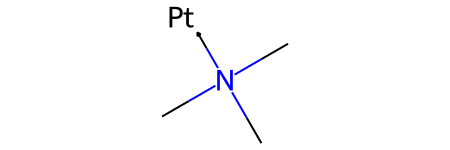

In [6]:
m = Chem.MolFromSmiles('CN(C)(C)[Pt]', sanitize=False)
m2 = set_dative_bonds(m)
m2

In [7]:
# We can check the bond between nitrogen and platium
print(m2.GetBondBetweenAtoms(1, 4).GetBondType())

DATIVE


In [8]:
# It also shows up in the output SMILES
# this is an RDKit extension to SMILES
print(Chem.MolToSmiles(m2))

CN(C)(C)->[Pt]


In [9]:
# Enumerate SMILES
# Enumerate variations of SMILES strings for the same molecule.
from rdkit import Chem
# Create a mol object
mol = Chem.MolFromSmiles('CC(N)C1CC1')

In [11]:
# Generate 100 random SMILES
smis = []
for i in range(100):
    smis.append(Chem.MolToSmiles(mol, doRandom=True, canonical=False))

In [12]:
# remove duplicates
smis_set = list(set(smis))
print(smis_set) # output will be random

['C1(CC1)C(N)C', 'C1(C(N)C)CC1', 'C(C1CC1)(C)N', 'C(N)(C)C1CC1', 'C1C(C1)C(N)C', 'C1(CC1)C(C)N', 'C(C)(C1CC1)N', 'C1C(C(C)N)C1', 'C(N)(C1CC1)C', 'C1CC1C(N)C', 'C(C1CC1)(N)C', 'C1CC1C(C)N', 'CC(N)C1CC1', 'C1C(C1)C(C)N', 'C1C(C(N)C)C1', 'CC(C1CC1)N', 'NC(C)C1CC1', 'C1(C(C)N)CC1', 'NC(C1CC1)C', 'C(C)(N)C1CC1']


In [13]:
# if we need the multiple random SMILES strings to be reproducible we can do this
m = Chem.MolFromSmiles('Oc1ncc(OC(CC)C)cc1')
print(Chem.MolToRandomSmilesVect(m,5))

['O(C(C)CC)c1cnc(cc1)O', 'O(C(CC)C)c1cnc(cc1)O', 'c1(ncc(OC(CC)C)cc1)O', 'c1c(OC(C)CC)cnc(O)c1', 'CCC(C)Oc1cnc(O)cc1']


In [14]:
# By default the results are not reproducible:
print(Chem.MolToRandomSmilesVect(m,5))

['CC(CC)Oc1ccc(nc1)O', 'c1(O)ccc(OC(C)CC)cn1', 'c1(cnc(cc1)O)OC(CC)C', 'c1(O)ccc(cn1)OC(C)CC', 'CCC(Oc1ccc(nc1)O)C']


In [15]:
# we can also provide a random number seed:
m = Chem.MolFromSmiles('Oc1ncc(OC(CC)C)cc1')
s1 = Chem.MolToRandomSmilesVect(m, 5, randomSeed=0xf00d)
print(s1)

['Oc1ccc(OC(CC)C)cn1', 'CC(CC)Oc1cnc(O)cc1', 'c1(O)ncc(cc1)OC(C)CC', 'c1cc(cnc1O)OC(CC)C', 'c1c(OC(CC)C)cnc(c1)O']


In [16]:
s2 = Chem.MolToRandomSmilesVect(m, 5, randomSeed=0xf00d)
print(s2 == s1)

True


In [17]:
# Reorder Atoms
# Create a canonical order of atoms independent of output.
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

In [18]:
m = Chem.MolFromSmiles('c1([C@H](C)CC)cccc2ccccc12')
m1 = Chem.MolFromSmiles('c12ccccc1c(ccc2)[C@H](C)CC')
print(Chem.MolToSmiles(m) == Chem.MolToSmiles(m1))

True


In [20]:
m_neworder = tuple(zip(*sorted([(j, i) for i,  j in enumerate (Chem.CanonicalRankAtoms(m))])))[1]
m1_neworder = tuple(zip(*sorted([(j, i) for i, j in enumerate (Chem.CanonicalRankAtoms(m1))])))[1]
print(m_neworder == m1_neworder)

False


In [21]:
# adding atoms numbers in the images
def addAtomIndices(mol):
    for i, a in enumerate(mol.GetAtoms()):
        a.SetAtomMapNum(i)

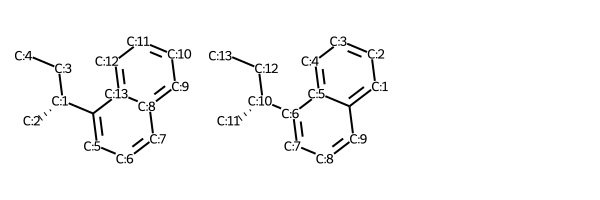

In [23]:
addAtomIndices(m)
addAtomIndices(m1)
MolsToGridImage((m, m1))

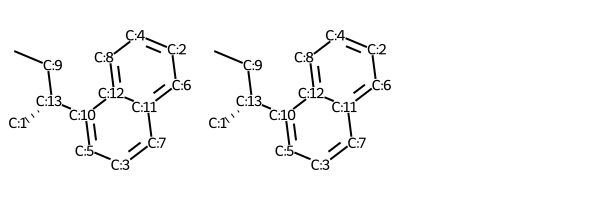

In [25]:
# Returing the atoms with same canonical ordering
m_renum = Chem.RenumberAtoms(m, m_neworder)
m1_renum = Chem.RenumberAtoms(m1, m1_neworder)
addAtomIndices(m_renum)
addAtomIndices(m1_renum)
MolsToGridImage((m_renum, m1_renum))

In [26]:
# Conformer Generation with ETKDG
# showcase various tricks for conformer generation with ETKDG

In [27]:
from rdkit import Chem
from rdkit.Chem import AllChem

"""
To yield more chemically meaningful conformers, Riniker and Landrum implemented
the experimental torsion knowledge distance geometry method which uses torsion angle
preferences from the Cambridge Structure Database (CSD) to correct the conformers
after distance geometry has been to generate them. The configs of various conformer
generation options are stored in a EmbedParameter object. To explicitly call the
ETKDG EmbedParameter object:
"""
params = AllChem.ETKDG()

In [30]:
# it includes additional small ring torsion potentials
params = AllChem.srETKDGv3()

# it will includes additional macrocycle ring torsion potential and marcocycle-specific handles
params = AllChem.ETKDGv3()


# ti use the two in conjection:
params = AllChem.ETKDGv3()
params.useSmallRingTorsions = True

# a macrocycle attached to a small ring
mol = Chem.MolFromSmiles("C(OC(CCCCCCC(OCCSC(CCCCCC1)=O)=O)OCCSC1=O)N1CCOCC1")
mol = Chem.AddHs(mol)
AllChem.EmbedMultipleConfs(mol, numConfs = 3, params = params)

In [32]:
from rdkit.Chem import rdDistGeom
import rdkit.DistanceGeometry as DG

mol = Chem.MolFromSmiles("C1CCC1C")
mol = Chem.AddHs(mol)
bm = rdDistGeom.GetMoleculeBoundsMatrix(mol)
bm[0, 3] = 1.21
bm[3, 0] = 1.20
bm[2, 3] = 1.21
bm[3, 2] = 1.20
bm[4, 3] = 1.21
bm[3, 4] = 1.20
DG.DoTriangleSmoothing(bm)

params.SetBoundsMat(bm)

Another tool we introduced is setting custom pairwise Coulombic interactions (CPCIs), which mimics additional electrostatic interactions between atom pairs to refine the embedded conformers. The setter takes in a dictionary of integer tuples as keys and reals as values. The following one-liner sets a repulsive (+ve) interaction of strength 0.9e^2 between the atom indexed 0 and indexed 3, with the idea of keeping these two atoms further aparts.

In [33]:
params.SetCPCI({(0,3) : 0.9})

In [34]:
# To Use the EmbedParameter for conformer generation:
params.useRandomCoords = True
# this is only an illustrative example, hydrogen are not added begore conformer 
# generation to keep the indices apparant
AllChem.EmbedMultipleConfs(mol, numConfs = 3, params = params)